# How to:
## Visualize Jackknifed Measurement Sets

In this section, we will plot the noise realizations and show how they differ from the original ones. We have built-in some tools for visualization that you can use. However, since all outputs are in FITS files and measurement sets, you can also use your own scripts to work with the outputs.

First, let's perform the same initialization as in the previous notebook.

In [1]:
import jacked

In [2]:
#initilaize
tool = jacked.Jack(fname   = '../../data/Glass-z13.ms', # The file name of the visibilities, 
                   outdir  = '../../output/', #the directory to save the outputs in
                   fields  = ['3'], # Each visibility can have multiple fields, 
                   spws    = [['0']], # and each field can have multiple spws,
                   band    = 'Band7', # Band of the observation,
                   array   = 'C7', # which configuration the observation are taken in,
                   )

### Input Data

In the previous notebook, we used the `tool.run(fname)` function to run the entire `jacked` pipeline. However, we can also call submodules to image the input data separately. Let's image the original dataset in the same way as we do for the jackknifed data to get a better understanding of the differences. We weill both show a continuum map and a moment-0 map. The moment-0 map is collapsed over the channels to reproduce the results of [Zavala+2024](https://arxiv.org/abs/2403.10491).

In [3]:
tool.clean( '../../data/Glass-z13.ms', reffreq = '254.35GHz')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


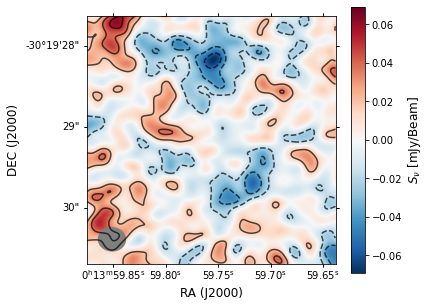

In [4]:
tool.plot_map(savedir = '../../plots/', moment = 'continuum')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


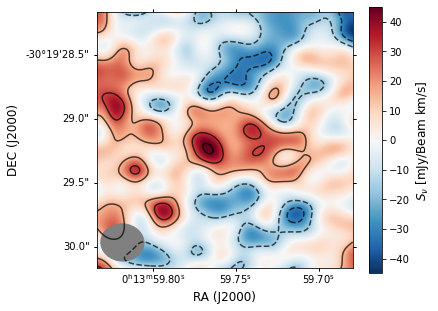

In [5]:
tool.plot_map(savedir = '../../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=2, center_coord=(3.498985, -30.324767))


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
100%|██████████| 60/60 [36:22<00:00, 36.38s/it]


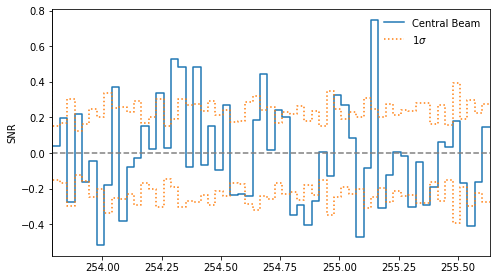

In [6]:
tool.plot_slp(savedir = '../../plots/', size = 3/2.355, savenp = True)

Plotting the spectral line profile might take a while. This is because we bootstrap the uncertainty with the aperture we use to extract the flux from in each channel map, ensuring we account for the correlated spatial noise in the image data. By default, extraction occurs at the center of the cube with a size equal to the beam's FWHM. You can adjust the aperture size using the `size` variable or change the aperture mask location by providing the central coordinates to the `tool.plot_slp()` module.

### Jackknifed Data

Since we have already jackknifed the data previously, we simply need to update the `tool.outfile` to direct to the jackknifed data cubes. If you haven't jackknifed the data yet, execute `tool.run(seed = 42)`, and `tool.outfile` will be updated automatically. Here are the results:

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


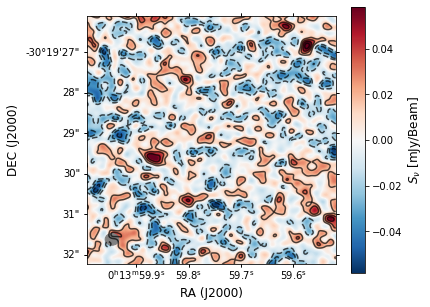

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


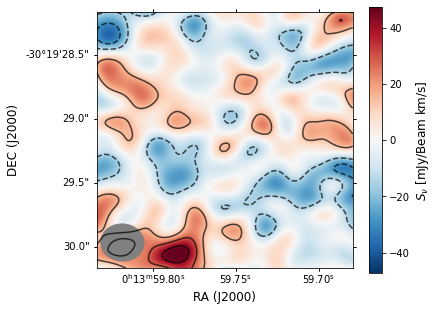

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
  0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
tool.outfile = '../../output/cubes/Glass-z13_Jacked_seed42.im'
tool.plot_map(savedir = '../../plots/', moment = 'continuum')
tool.plot_map(savedir = '../../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=2, center_coord=(3.498985, -30.324767))
tool.plot_slp(savedir = '../../plots/', size = 3/2.355, savenp = True)

In [ ]:
tool.outfile = '../../output/cubes/Glass-z13_Jacked_seed142.im'
tool.plot_map(savedir = '../../plots/', moment = 'continuum')
tool.plot_map(savedir = '../../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=2, center_coord=(3.498985, -30.324767))
tool.plot_slp(savedir = '../../plots/', size = 3/2.355, savenp = True)

In [ ]:
tool.outfile = '../../output/cubes/Glass-z13_Jacked_seed242.im'
tool.plot_map(savedir = '../../plots/', moment = 'continuum')
tool.plot_map(savedir = '../../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=2, center_coord=(3.498985, -30.324767))
tool.plot_slp(savedir = '../../plots/', size = 3/2.355, savenp = True)

In [ ]:
tool.outfile = '../../output/cubes/Glass-z13_Jacked_seed243.im'
tool.plot_map(savedir = '../../plots/', moment = 'continuum')
tool.plot_map(savedir = '../../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=2, center_coord=(3.498985, -30.324767))
tool.plot_slp(savedir = '../../plots/', size = 3/2.355, savenp = True)

### Fig. 3

In [ ]:
# tool.outfile = '../../output/cubes/Glass-z13_Jacked_seed244.im'
# tool.plot_map(savedir = '../../plots/', moment = 'continuum')
# tool.plot_map(savedir = '../../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=2, center_coord=(3.498985, -30.324767))
# tool.plot_slp(savedir = '../../plots/', size = 3/2.355, savenp = True)